In [1]:
# Parameters
# TODO Allow caller to specify index and peers
ticker_symbol = "MSFT"

In [2]:
import datetime
import pandas as pd
import pandas_ta as ta
import yfinance as yf
import requests_cache
import matplotlib.pyplot as plt
import mplfinance as mpf

from IPython.display import display, Markdown, Latex
from matplotlib.lines import Line2D

In [3]:
session = requests_cache.CachedSession("yfinance.cache")
session.headers["User-Agent"] = f"ta-{ticker_symbol}-notebook/1.0"

In [4]:
ticker = yf.Ticker(ticker_symbol, session=session)
ticker_short_name = ticker.info["shortName"]

In [5]:
display(Markdown(f"# Technical analysis: {ticker_short_name} ({ticker_symbol})"))

# Technical analysis: Microsoft Corporation (MSFT)

## Load data

In [6]:
today_datetime = datetime.datetime.now()

pattern = "%Y-%m-%d"
today = today_datetime.strftime(pattern)
one_month_ago = (today_datetime - datetime.timedelta(days=30)).strftime(pattern)
three_months_ago = (today_datetime - datetime.timedelta(days=90)).strftime(pattern)
six_months_ago = (today_datetime - datetime.timedelta(days=180)).strftime(pattern)
one_year_ago = (today_datetime - datetime.timedelta(days=365)).strftime(pattern)

In [7]:
print(f"Loading history: start={one_year_ago}, end={today}")
hist = ticker.history(start=one_year_ago, end=today)

Loading history: start=2021-01-26, end=2022-01-26


In [8]:
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-26,229.932648,232.233355,228.167446,230.398743,49169600,0.0,0
2021-01-27,236.021617,238.441336,228.226953,230.964005,69870600,0.0,0
2021-01-28,233.651454,240.623014,233.135772,236.943848,49111200,0.0,0
2021-01-29,234.028329,236.041453,229.426900,230.031830,42503100,0.0,0
2021-02-01,233.106041,240.484198,230.497898,237.657883,33314200,0.0,0


## Candlestick charts

In [9]:
def plot_candlestick(start, end):
    mpf.plot(
        hist[start:end],
        type="candle",
        title=f"{ticker_short_name} ({ticker_symbol})\n{start} to {end}",
        ylabel="Price ($)",
        volume=True,
        ylabel_lower="Volume",
        show_nontrading=False,
        mav=(4),
        figratio=(12, 6),
        style="yahoo")

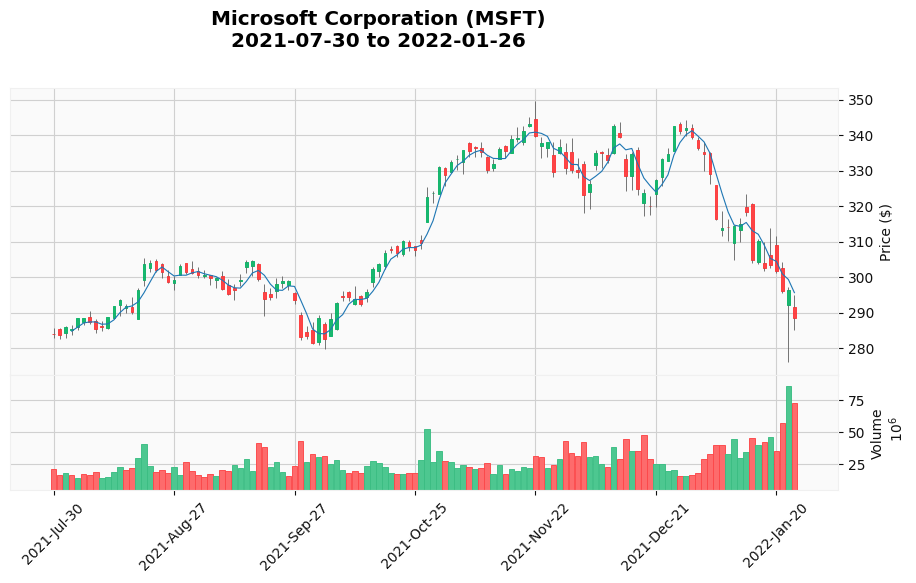

In [10]:
plot_candlestick(six_months_ago, today)

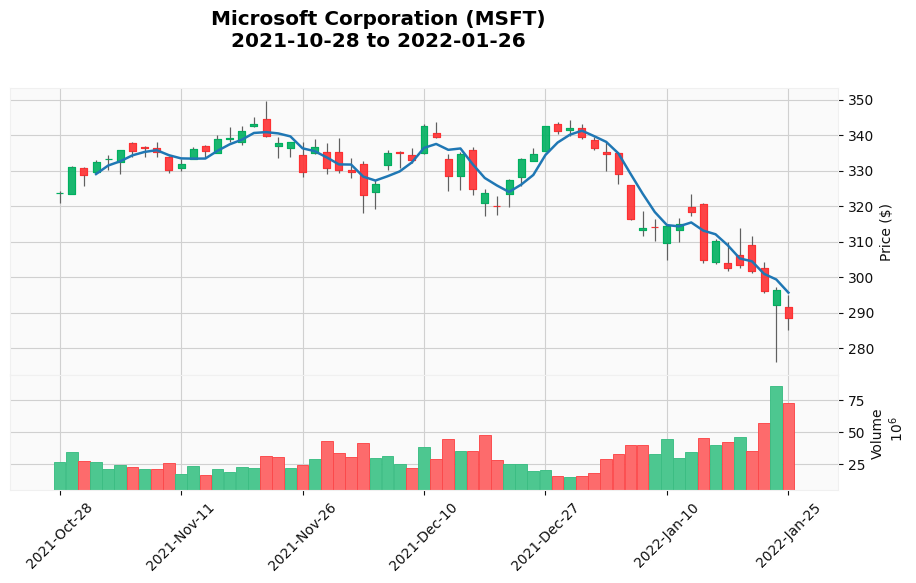

In [11]:
plot_candlestick(three_months_ago, today)

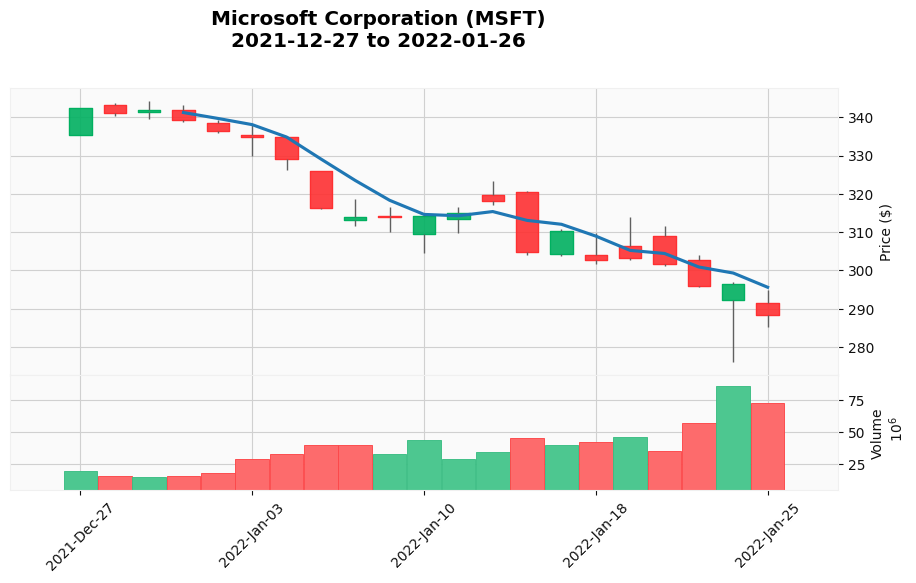

In [12]:
plot_candlestick(one_month_ago, today)

## Capital appreciation 

In [13]:
# TODO Support plotting against index and also peers
def plot_capital_appreciation(start, end):
    comb_df = pd.DataFrame({
        ticker_symbol: hist[start:end]["Close"],
    })
    norm_df = comb_df.div(comb_df.iloc[0])
    norm_df.plot(title=f"Capital appreciation: {ticker_symbol}\n{start} to {end}")

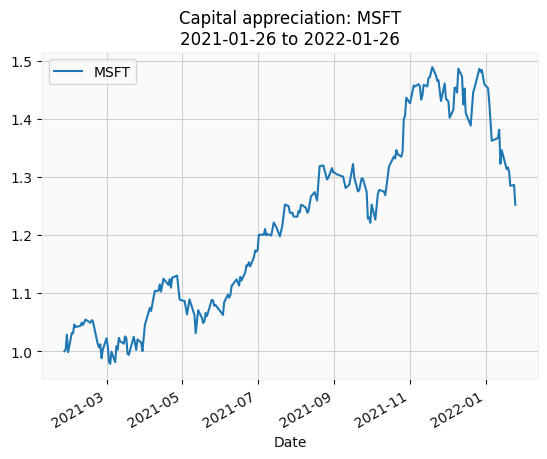

In [14]:
plot_capital_appreciation(one_year_ago, today)

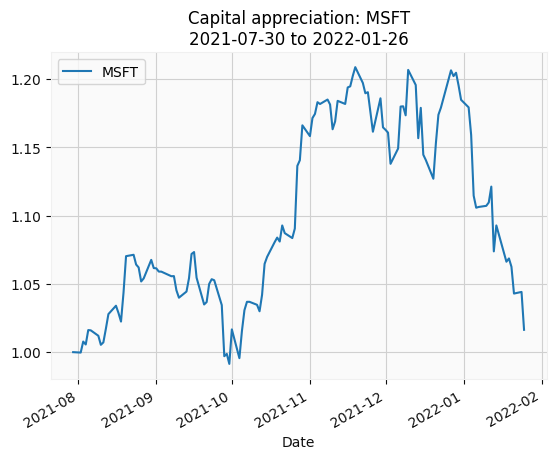

In [15]:
plot_capital_appreciation(six_months_ago, today)

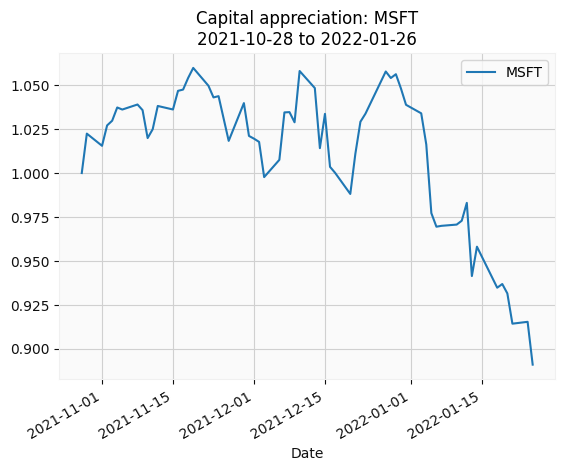

In [16]:
plot_capital_appreciation(three_months_ago, today)

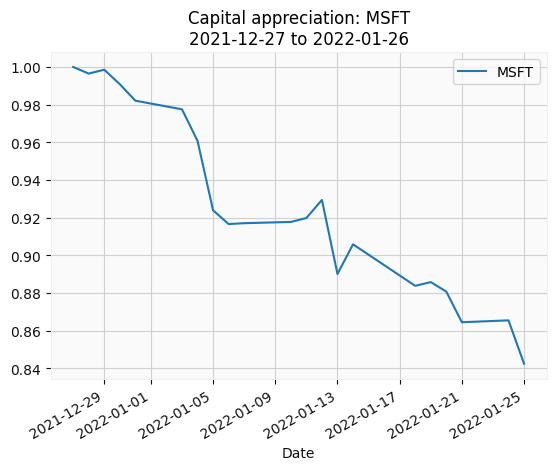

In [17]:
plot_capital_appreciation(one_month_ago, today)